# ML Lab5
#### Author: Pumnia Mykhailo, KM-22
---

1. Open and read the provided data file.

In [15]:
import pandas as pd

data = pd.read_csv('./ЛР5-пгр1.csv', delimiter=';', decimal=',')

data.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


2. Determine and display the number of records.

In [16]:
records_n, fields_n = data.shape
print(f'Records: {records_n}, Fields: {fields_n}')

Records: 1030, Fields: 9


3. Remove the Concrete compressive strength attribute.

In [17]:
# Preproccess columns
data.columns = data.columns.str.replace(r"\s*\(.*$", "", regex=True)

In [18]:
data.drop(columns=['Concrete compressive strength'], inplace=True)

4. Display the remaining attributes.

In [19]:
print(data.columns.to_list())

['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']


5. Using the KMeans function of the scikit-learn library, perform the partitioning of the data set into clusters with random initial initialization and display the coordinates of the cluster centers. Determine the optimal number of clusters based on the initial data set using three different methods:
  1) elbow method;
  2) average silhouette method;
  3) prediction strength method (see section 9.2.3 Determining the Number of Clusters of Andriy Burkov. The Hundred-Page Machine Learning Book).

Compare the results obtained and explain which method gave the best result and why (in your opinion).

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

RANDOM_STATE = 41
K = list(range(1, 21))

In [21]:
# Elbow method
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', random_state=RANDOM_STATE)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

In [22]:
# Average silhouette method
silhouette_scores = []
for k in K[1:]:
    kmeans = KMeans(n_clusters=k, init='random', random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

In [23]:
# Prediction strength method
strengths = []

train_data, test_data = train_test_split(data, test_size=0.5, random_state=RANDOM_STATE)

for k in K:
  kmeans_train = KMeans(n_clusters=k, init='random', random_state=RANDOM_STATE).fit(train_data)
  kmeans_test = KMeans(n_clusters=k, init='random', random_state=RANDOM_STATE).fit(test_data)
  
  A = kmeans_train.predict(test_data)
  Aj = kmeans_test.predict(test_data)

  D = np.equal.outer(A, A).astype(int)

  ps_scores = []
  for j in range(k):
    n = np.sum(Aj == j)

    idx = np.where(Aj == j)[0]
    s = D[np.ix_(idx, idx)].sum()
    
    ps = s / (n * (n - 1))
    ps_scores.append(ps)

  ps_score = min(ps_scores)

  strengths.append(ps_score)


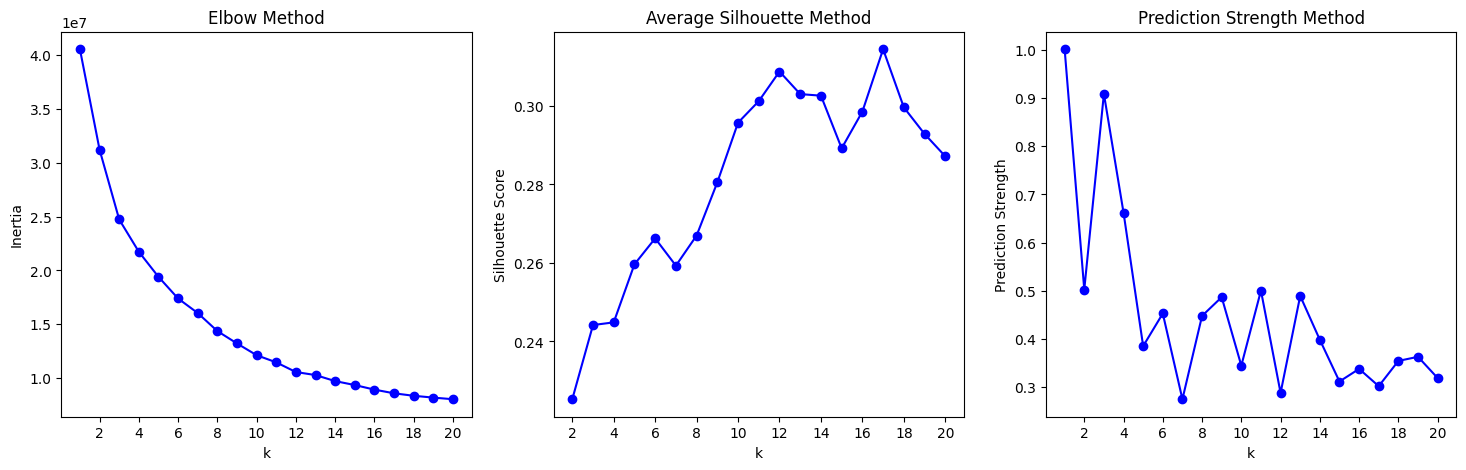

In [24]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(K, inertia, 'bo-')
plt.xticks(K[1::2])
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 3, 2)
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xticks(K[1::2])
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Average Silhouette Method')

plt.subplot(1, 3, 3)
plt.plot(K, strengths, 'bo-')
plt.xticks(K[1::2])
plt.xlabel("k")
plt.ylabel("Prediction Strength")
plt.title("Prediction Strength Method")

plt.show()

I will choose `k = 3` as it is the only value (according to PS method) that keeps clustering stable. Also this value looks like one of possible elbow points (according to Elbow method).
This value not produce high average silhouette score, but in my opinion the stability is more valuable then less sparseness for our dataset.

In [25]:
BEST_K = 3

6. For the previously selected number of clusters, perform the k-means clustering method repeatedly, using the k-means++ method for initial initialization.
Choose the best clustering option. What quantitative criterion did you choose to select the best clustering?

In [26]:
N = 5
best_score = -1
best_kmeans = None
best_labels = None

for _ in range(N):
    kmeans = KMeans(n_clusters=BEST_K, init='k-means++', random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)

    if score > best_score:
        best_score = score
        best_kmeans = kmeans
        best_labels = labels

print(best_kmeans)
print(f'Best silhouette score: {best_score}')

data_with_clusters = data.copy()
data_with_clusters['kmeans_cluster'] = best_labels
data_with_clusters.groupby('kmeans_cluster').mean()


KMeans(n_clusters=3, random_state=41)
Best silhouette score: 0.24412923460191988


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
kmeans_cluster,,,,,,,,
0,224.551163,11.456395,102.221221,173.568895,7.040407,1016.425581,814.556977,39.095930
1,399.307164,30.509851,26.037612,182.569851,6.257313,959.255522,758.700597,57.982090
2,223.901425,176.498291,33.980912,188.449288,5.335328,943.320513,747.622792,40.339031


7. Using the AgglomerativeClustering function of the scikitlearn library, divide the data set into clusters. Choose the same number of clusters as in the previous method. Output the coordinates of the cluster centers.

In [27]:
agglo = AgglomerativeClustering(n_clusters=BEST_K)
agglo_labels = agglo.fit_predict(data)

data_with_clusters['agglo_cluster'] = agglo_labels
data_with_clusters.groupby('agglo_cluster').mean()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,kmeans_cluster
agglo_cluster,,,,,,,,,
0,405.424000,86.259600,13.604000,181.560000,7.955200,931.853600,742.230400,80.048000,1.284000
1,200.268182,172.548601,46.626573,188.769231,5.188112,947.677622,748.648252,30.618881,1.926573
2,265.121862,10.524089,79.104858,177.401417,5.907287,1008.314372,803.880364,36.969636,0.334008


8. Compare the results of the two used clustering methods.

KMeans silhouette score: 0.24412923460191988
 Agglo silhouette score: 0.23399705827162526


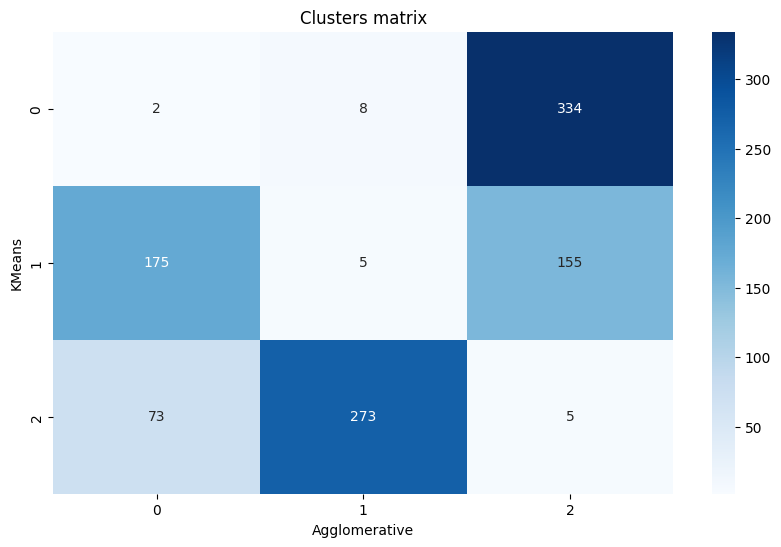

In [28]:
agglo_score = silhouette_score(data, agglo_labels)

print(f'KMeans silhouette score: {best_score}')
print(f' Agglo silhouette score: {agglo_score}')

import seaborn as sns
import numpy as np

counts = data_with_clusters.groupby(['kmeans_cluster', 'agglo_cluster']).count()['Cement']
cluster_matrix = np.reshape(counts, (BEST_K, BEST_K))

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Clusters matrix")
plt.xlabel("Agglomerative")
plt.ylabel("KMeans")
plt.show()